# Comparison on error variation on the experiments of Q-OMP, Q-MPb and Q-MPc

## Read Data from files

In [56]:
import numpy as np
import json

In [57]:
iterations = 5
xi = 0.01
kind = 'QMPc'
step = 0.01
size = 550

In [58]:
names = list()
errors = list()
for i in range(0, iterations, 1):
    names.append('data_dump_' + "{:.2f}".format(xi) +'_'+kind + '.json')
    errors.append(xi)
    xi = xi + step
names

['data_dump_0.01_QMPc.json',
 'data_dump_0.02_QMPc.json',
 'data_dump_0.03_QMPc.json',
 'data_dump_0.04_QMPc.json',
 'data_dump_0.05_QMPc.json']

## Computation of different metrics

In [59]:
data = []
c_mean = []
c_std = []
q_mean = []
q_std = []
sim_mean = []
sim_std = []

for i in range(0, iterations, 1):
    with open(names[i]) as f:
        data.append(json.load(f))

    c = list()
    q = list()
    c = list(data[i]["class_k"])
    q = list(data[i]["quant_k"])
    c_mean_sub = []
    c_std_sub = []
    q_mean_sub = []
    q_std_sub = []
    sim_mean_sub = []
    sim_std_sub = []

    for j in range(0, len(c), 1):
        c_mean_sub.append(np.mean(c[j]))
        c_std_sub.append(np.std(c[j]))
        q_mean_sub.append(np.mean(q[j]))
        q_std_sub.append(np.std(q[j]))
        sim_mean_sub.append(q_mean_sub[j]/c_mean_sub[j])
        sim_std_sub.append(q_std_sub[j]/c_std_sub[j])

    c_mean.append(c_mean_sub)
    c_std.append(c_std_sub)
    q_mean.append(q_mean_sub)
    q_std.append(q_std_sub)
    sim_mean.append(sim_mean_sub)
    sim_std.append(sim_std_sub)


In [60]:
c_mean

[[15.56, 28.64, 42.05, 55.72, 68.08, 83.34, 95.39, 110.53, 123.63, 136.29],
 [15.82, 29.07, 42.13, 56.05, 68.23, 82.72, 95.33, 109.69, 123.2, 136.21],
 [15.74, 29.59, 42.24, 55.56, 68.66, 82.55, 95.44, 109.84, 122.52, 135.54],
 [15.93, 28.45, 42.41, 56.38, 68.66, 81.7, 96.29, 110.62, 123.04, 135.3],
 [15.94, 28.72, 42.52, 55.71, 68.78, 82.63, 95.08, 110.98, 123.29, 135.86]]

In [61]:
q_mean

[[15.51, 28.7, 42.07, 55.53, 68.04, 83.08, 95.32, 110.06, 123.28, 135.66],
 [15.77, 28.99, 41.92, 55.84, 68.23, 82.61, 95.16, 109.09, 122.24, 135.35],
 [15.99, 29.69, 42.09, 54.22, 67.78, 81.49, 95.55, 109.25, 120.09, 134.54],
 [16.36, 28.14, 42.52, 55.52, 67.0, 80.48, 94.64, 107.71, 120.15, 132.2],
 [16.32, 29.06, 41.35, 55.19, 67.53, 79.61, 92.55, 106.32, 118.31, 130.13]]

## Plot the results

In [62]:
similarities = list()
deviations = list()
for i in range(0, iterations, 1):
    similarities.append(np.mean(sim_mean[i]))
    deviations.append(np.std(sim_mean[i]))

<function matplotlib.pyplot.show(close=None, block=None)>

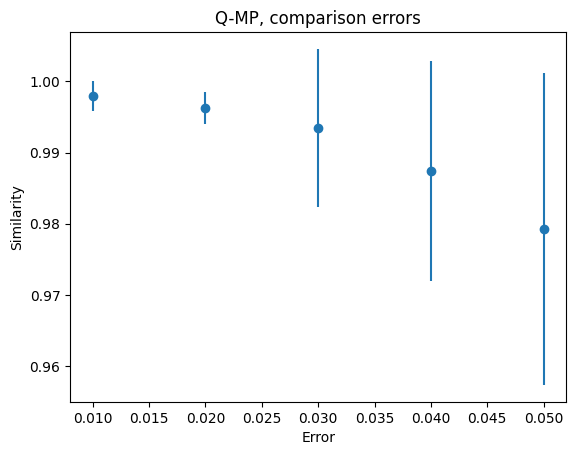

In [63]:
from matplotlib import pyplot as plt
plt.errorbar(errors, similarities, deviations, linestyle='none', marker="o")
plt.title("Q-MP, comparison errors")
plt.xlabel("Error")
plt.ylabel("Similarity")
img_name = 'ev_'+kind +'_' + "{:.2f}".format(xi)+'_' + "{:.2f}".format(step) +'_' + "{:.2f}".format(size) +'_' + "{:.2f}".format(iterations) + '.png'
# 'ev_QOMP_0.01_0.01_550_5.png'
plt.savefig(img_name, bbox_inches='tight')
plt.show

In [64]:
components = np.arange(50, size, 50)
components

array([ 50, 100, 150, 200, 250, 300, 350, 400, 450, 500])

<function matplotlib.pyplot.show(close=None, block=None)>

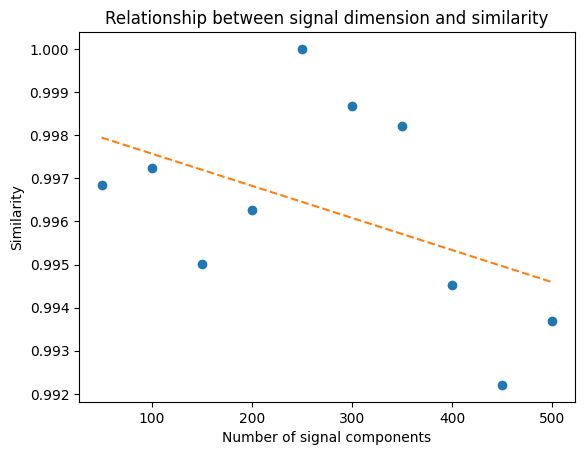

In [65]:
from matplotlib import pyplot as plt

plt.errorbar(components, sim_mean[1],label='Value', linestyle='none', marker="o")
z = np.polyfit(components, sim_mean[1], 1)
p = np.poly1d(z)
plt.plot(components, p(components), label='Mean', linestyle='--')
plt.title("Relationship between signal dimension and similarity")
plt.xlabel("Number of signal components")
plt.ylabel("Similarity")
img_name = 'dimdep_' + kind +'_' + "{:.2f}".format(xi) + '.png'
# 'dimdep_QOMP_0.01.png'
plt.savefig(img_name, bbox_inches='tight')
plt.show

In [66]:
import scipy as sc
sc.stats.shapiro(sim_mean[0])

ShapiroResult(statistic=0.9139184951782227, pvalue=0.3090057671070099)